# Generating Fractals with Python

In [2]:
import numpy as np
# from numba import jit
 

# @jit
def mandelbrot(c,maxiter):
    z = c
    for n in range(maxiter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return 0

In [3]:
# @jit
def mandelbrot_set(xmin,xmax,ymin,ymax,width,height,maxiter):
    r1 = np.linspace(xmin, xmax, width)
    r2 = np.linspace(ymin, ymax, height)
    n3 = np.empty((width,height))
    for i in range(width):
        for j in range(height):
            n3[i,j] = mandelbrot(r1[i] + 1j*r2[j],maxiter)
    return (r1,r2,n3)

In [15]:
from matplotlib import pyplot as plt
from matplotlib import colors
%matplotlib inline
 

def mandelbrot_image(xmin,xmax,ymin,ymax,width=10,height=10,maxiter=256):
	dpi = 72
	img_width = dpi * width
	img_height = dpi * height
	x,y,z = mandelbrot_set(xmin,xmax,ymin,ymax,img_width,img_height,maxiter)

	print(f"x:{x.shape},\ty:{y.shape},\tz:{z.shape}")

	fig, ax = plt.subplots(figsize=(width, height),dpi=72)
	ticks = np.arange(0,img_width,3*dpi)
	x_ticks = xmin + (xmax-xmin)*ticks/img_width
	plt.xticks(ticks, x_ticks)
	y_ticks = ymin + (ymax-ymin)*ticks/img_width
	plt.yticks(ticks, y_ticks)

	ax.imshow(z.T,origin='lower') 

	save_image(fig)


In [16]:
image_counter = 30

def save_image(fig):
    global image_counter
    filename = "mandelbrodt_%d.png" % image_counter
    image_counter += 1
    fig.savefig(filename)

x:(720,),	y:(720,),	z:(720, 720)


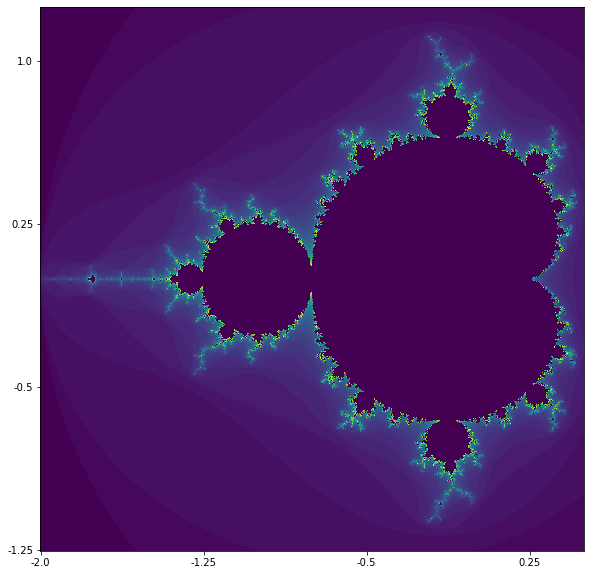

In [20]:
mandelbrot_image(-2.0,0.5,-1.25,1.25, maxiter=50)

x:(720,),	y:(720,),	z:(720, 720)


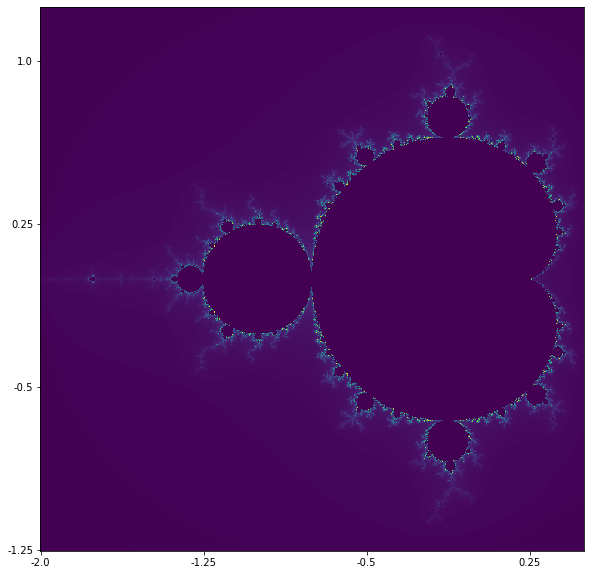

In [21]:
mandelbrot_image(-2.0,0.5,-1.25,1.25, maxiter=256)

x:(720,),	y:(720,),	z:(720, 720)


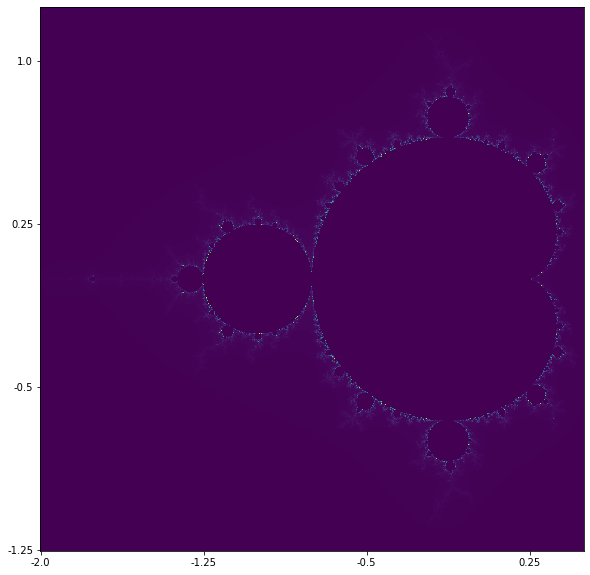

In [22]:
mandelbrot_image(-2.0,0.5,-1.25,1.25, maxiter=1024)

In [23]:
def mandelbrot_image(xmin,xmax,ymin,ymax,width=10,height=10,maxiter=80,cmap='jet'):
    dpi = 72
    img_width = dpi * width
    img_height = dpi * height
    x,y,z = mandelbrot_set(xmin,xmax,ymin,ymax,img_width,img_height,maxiter)
    
    fig, ax = plt.subplots(figsize=(width, height),dpi=72)
    ticks = np.arange(0,img_width,3*dpi)
    x_ticks = xmin + (xmax-xmin)*ticks/img_width
    plt.xticks(ticks, x_ticks)
    y_ticks = ymin + (ymax-ymin)*ticks/img_width
    plt.yticks(ticks, y_ticks)
    ax.set_title(cmap)
    
    ax.imshow(z.T,cmap=cmap,origin='lower') 
    
    save_image(fig)

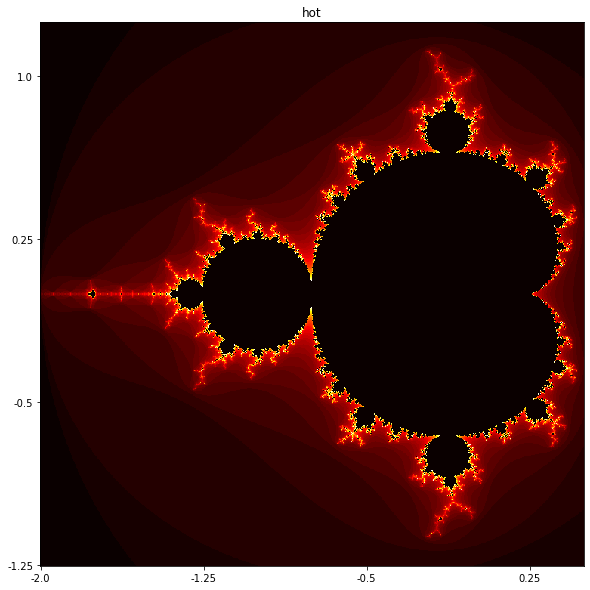

In [24]:
mandelbrot_image(-2.0,0.5,-1.25,1.25,maxiter=50,cmap='hot')

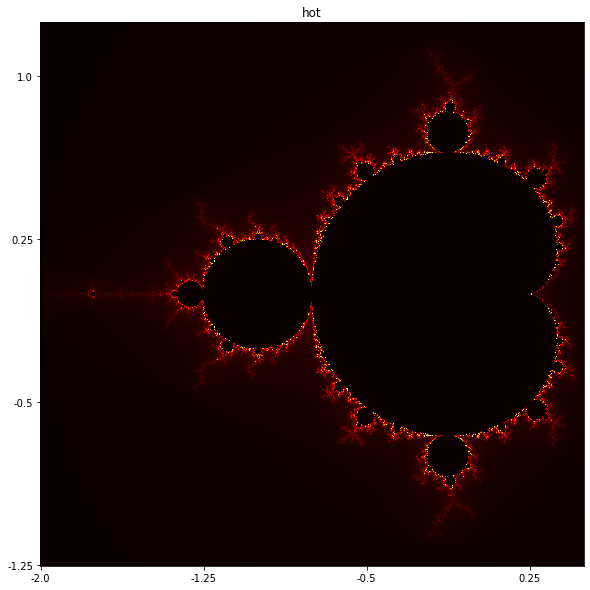

In [25]:
mandelbrot_image(-2.0,0.5,-1.25,1.25,maxiter=256,cmap='hot')

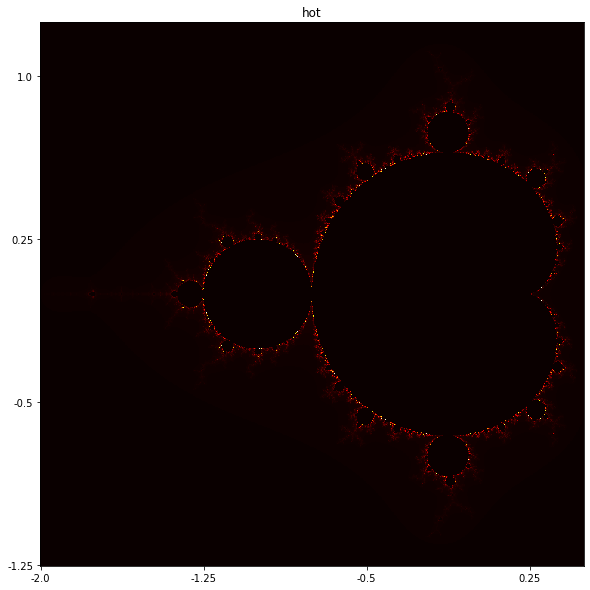

In [26]:
mandelbrot_image(-2.0,0.5,-1.25,1.25,maxiter=1024,cmap='hot')

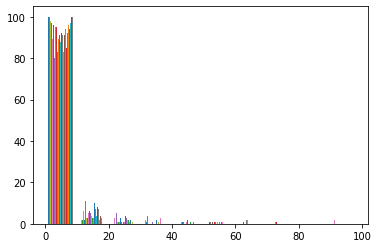

In [27]:
r1,r2,z = mandelbrot_set(-2.0,0.5,-1.25,1.25,100,100,100)
plt.hist(z)
plt.show()

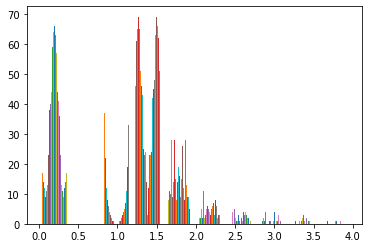

In [28]:
z3 = z ** 0.3
plt.hist(z3)
plt.show()

In [29]:
def mandelbrot_image(xmin,xmax,ymin,ymax,width=10,height=10,\
                     maxiter=80,cmap='jet',gamma=0.3):
    dpi = 72
    img_width = dpi * width
    img_height = dpi * height
    x,y,z = mandelbrot_set(xmin,xmax,ymin,ymax,img_width,img_height,maxiter)
    
    fig, ax = plt.subplots(figsize=(width, height),dpi=72)
    ticks = np.arange(0,img_width,3*dpi)
    x_ticks = xmin + (xmax-xmin)*ticks/img_width
    plt.xticks(ticks, x_ticks)
    y_ticks = ymin + (ymax-ymin)*ticks/img_width
    plt.yticks(ticks, y_ticks)
    ax.set_title(cmap)
    
    norm = colors.PowerNorm(gamma)
    ax.imshow(z.T,cmap=cmap,origin='lower',norm=norm)  
    
    save_image(fig)

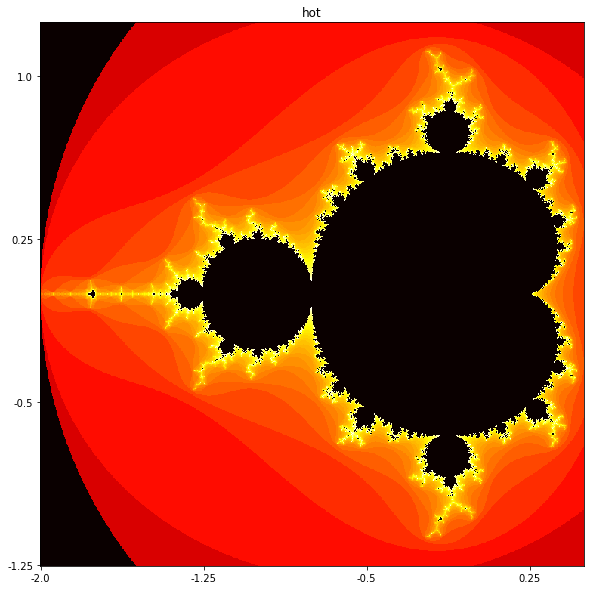

In [30]:
mandelbrot_image(-2.0,0.5,-1.25,1.25,maxiter=50,cmap='hot')

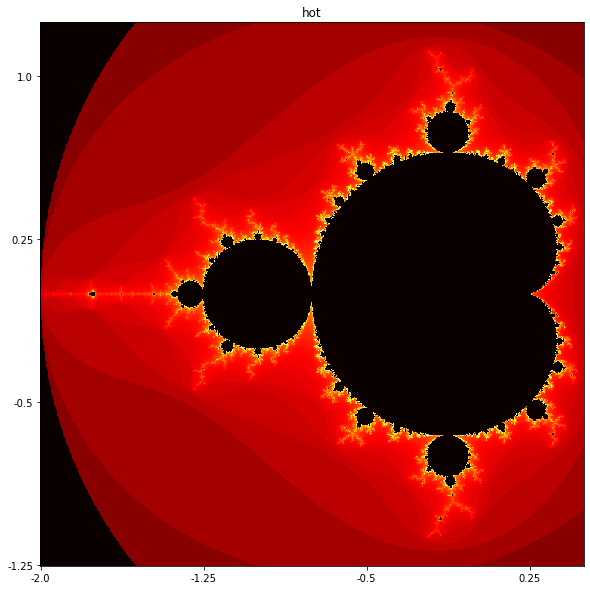

In [31]:
mandelbrot_image(-2.0,0.5,-1.25,1.25,maxiter=256,cmap='hot')

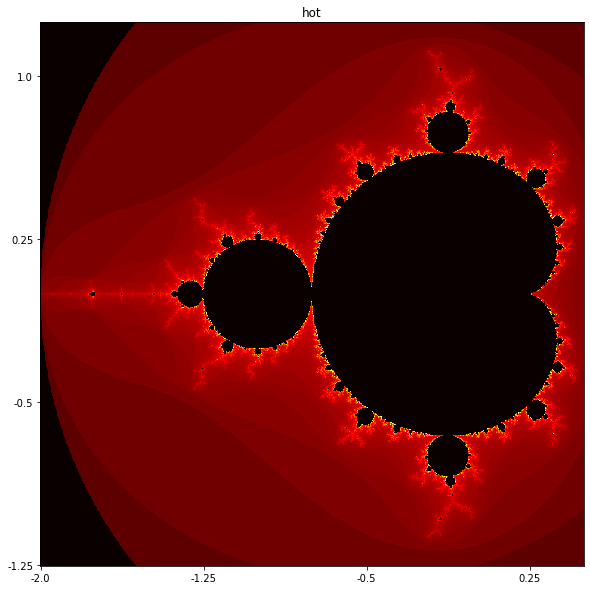

In [32]:
mandelbrot_image(-2.0,0.5,-1.25,1.25,maxiter=1024,cmap='hot')

In [33]:
# @jit
def mandelbrot(z,maxiter,horizon,log_horizon):
    c = z
    for n in range(maxiter):
        az = abs(z)
        if az > horizon:
            return n - np.log(np.log(az))/np.log(2) + log_horizon
        z = z*z + c
    return 0

# @jit
def mandelbrot_set(xmin,xmax,ymin,ymax,width,height,maxiter):
    horizon = 2.0 ** 40
    log_horizon = np.log(np.log(horizon))/np.log(2)
    r1 = np.linspace(xmin, xmax, width)
    r2 = np.linspace(ymin, ymax, height)
    n3 = np.empty((width,height))
    for i in range(width):
        for j in range(height):
            n3[i,j] = mandelbrot(r1[i] + 1j*r2[j],maxiter,horizon, log_horizon)
    return (r1,r2,n3)

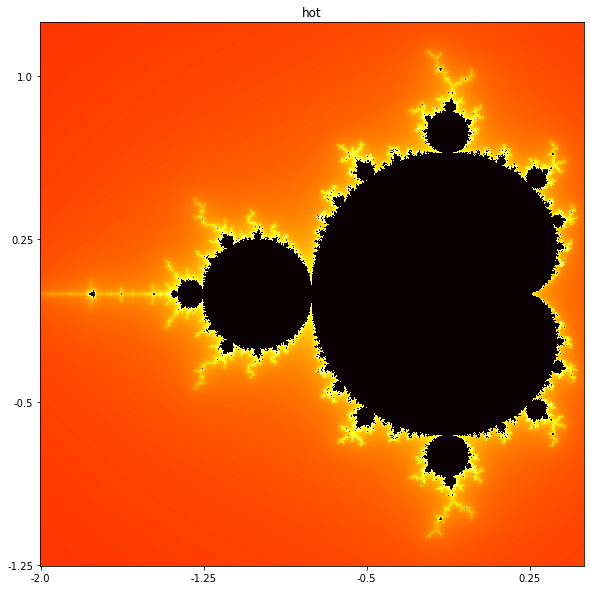

In [34]:
mandelbrot_image(-2.0,0.5,-1.25,1.25,maxiter=80,cmap='hot')

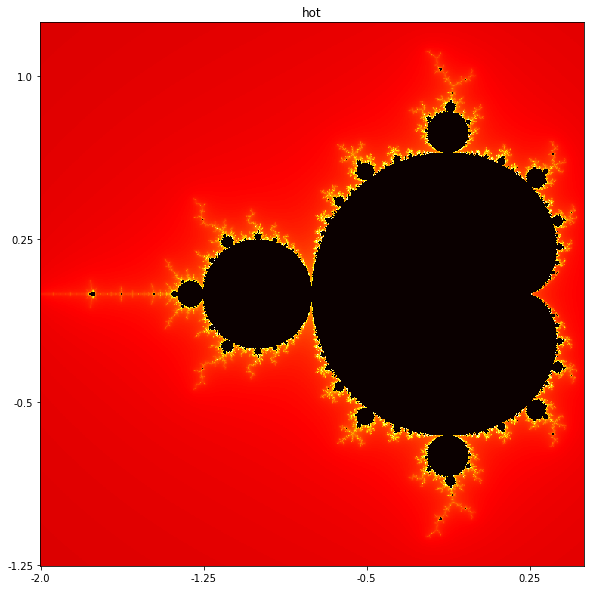

In [35]:
mandelbrot_image(-2.0,0.5,-1.25,1.25,maxiter=256,cmap='hot')

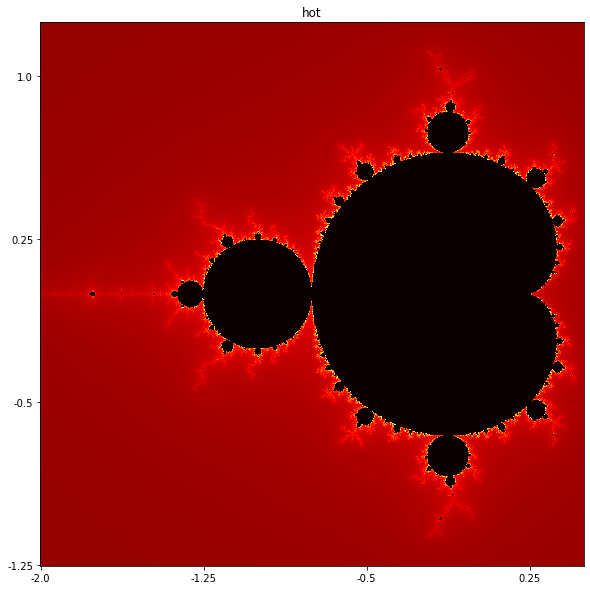

In [36]:
mandelbrot_image(-2.0,0.5,-1.25,1.25,maxiter=1024,cmap='hot')

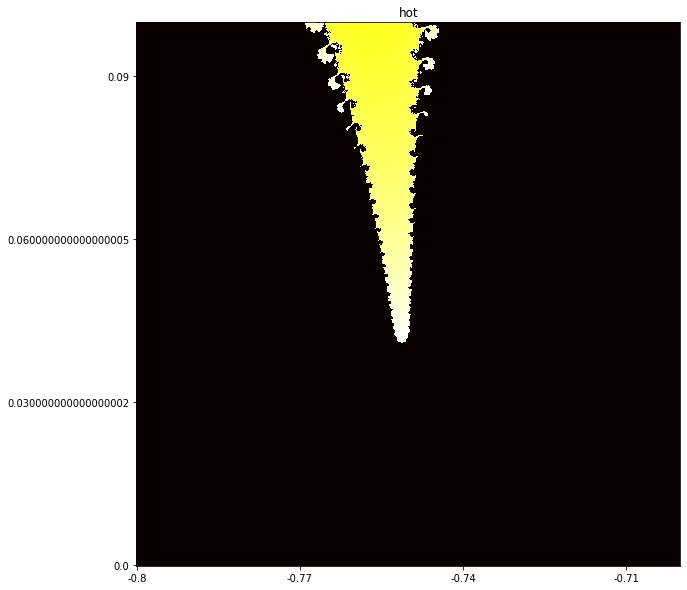

In [37]:
mandelbrot_image(-0.8,-0.7,0,0.1,cmap='hot')

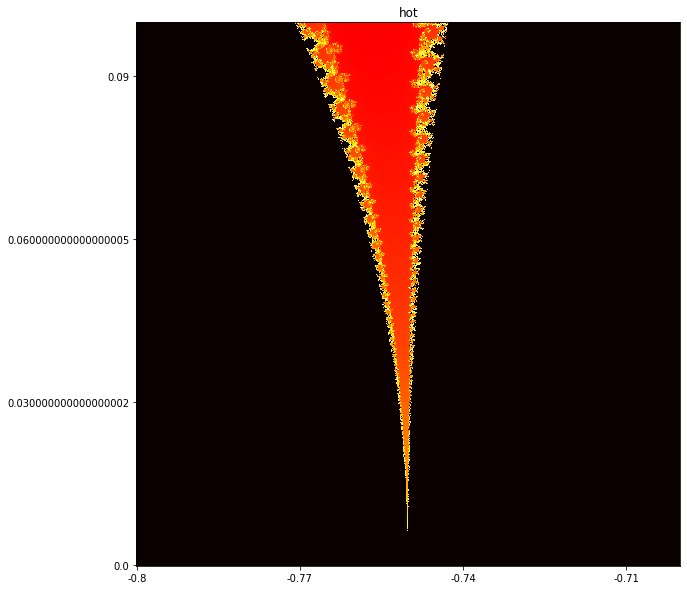

In [38]:
mandelbrot_image(-0.8,-0.7,0,0.1, maxiter=1024, cmap='hot')

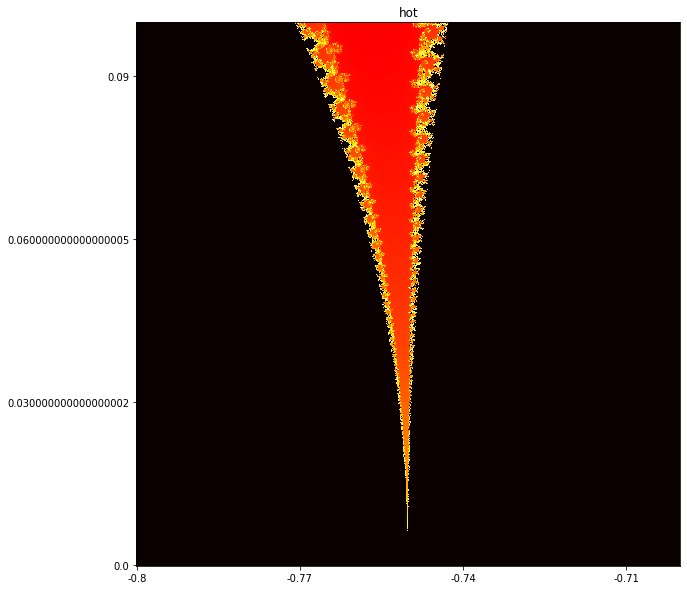

In [40]:
mandelbrot_image(-0.8,-0.7,0,0.1, maxiter=1024, cmap='hot')

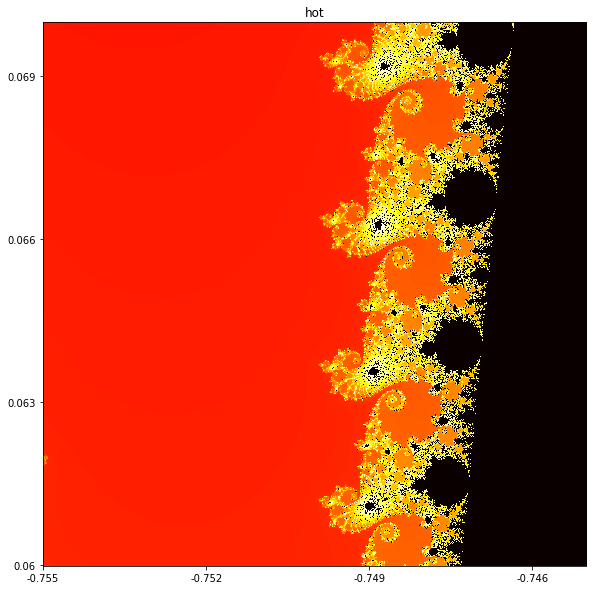

In [41]:
mandelbrot_image(-0.755, -0.745 , 0.06, 0.07, maxiter=1024, cmap='hot')

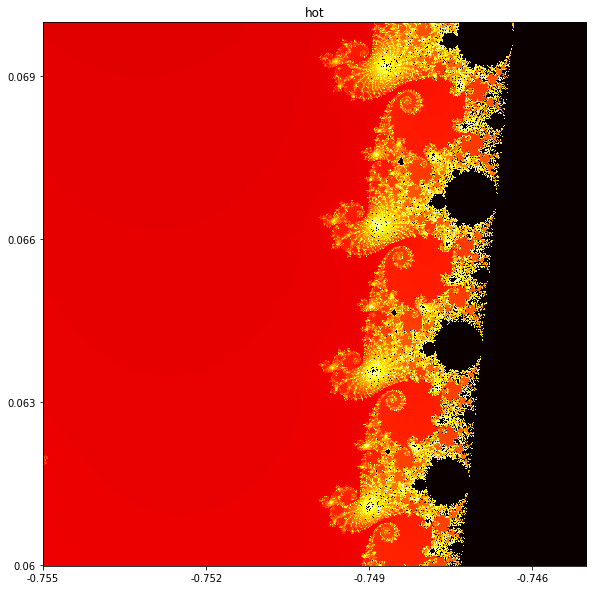

In [44]:
mandelbrot_image(-0.755, -0.745 , 0.06, 0.07, maxiter=2048, cmap='hot')

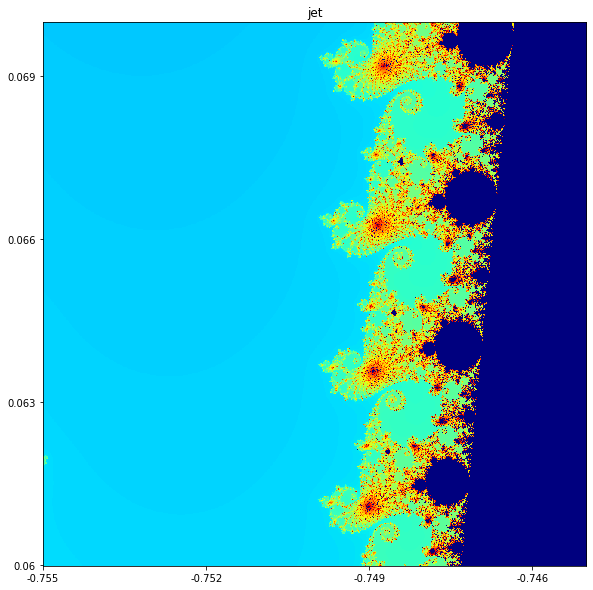

In [45]:
mandelbrot_image(-0.755, -0.745 , 0.06, 0.07, maxiter=2048, cmap='jet')

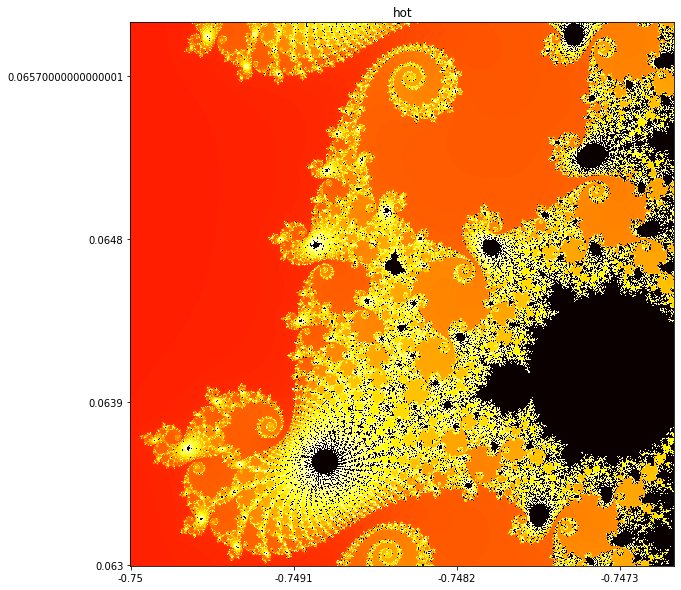

In [42]:
mandelbrot_image(-0.75, -0.747 , 0.063, 0.066, maxiter=1024, cmap='hot')

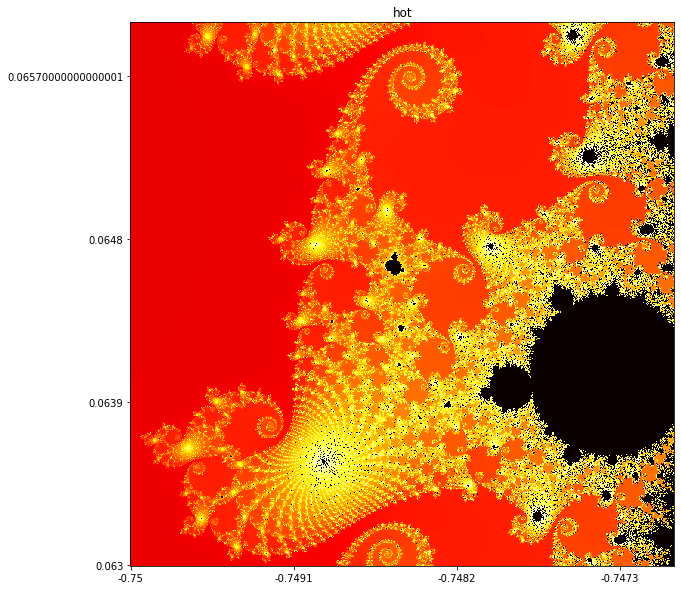

In [50]:
mandelbrot_image(-0.75, -0.747 , 0.063, 0.066, maxiter=2048, cmap='hot')

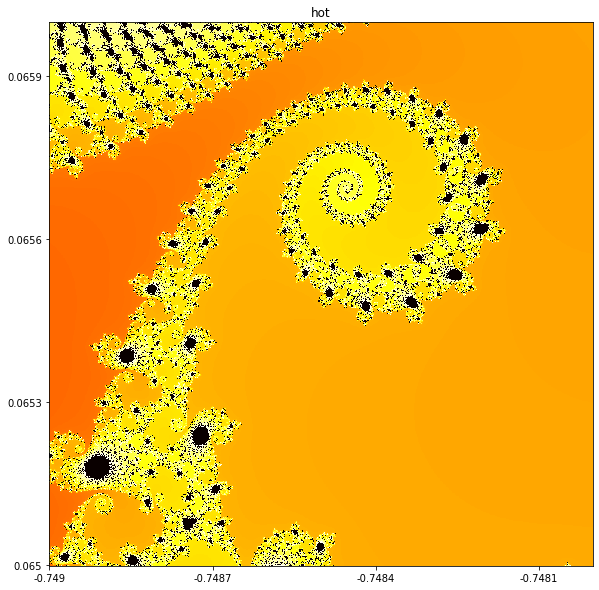

In [47]:
mandelbrot_image(-0.749, -0.748 , 0.065, 0.066, maxiter=512, cmap='hot')

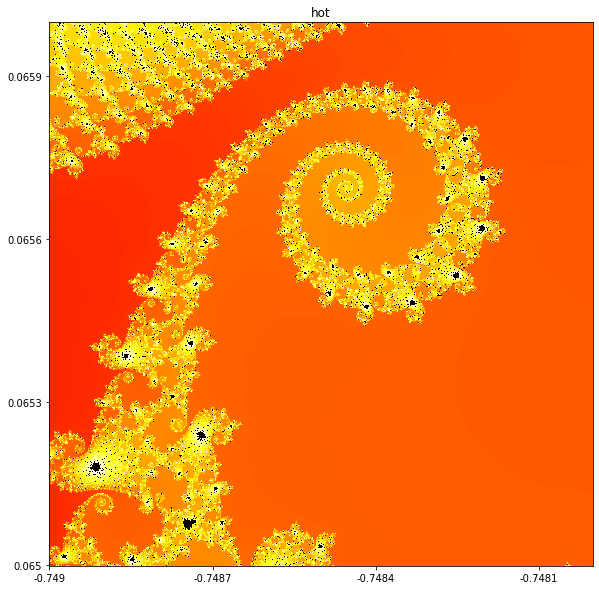

In [51]:
mandelbrot_image(-0.749, -0.748 , 0.065, 0.066, maxiter=1024, cmap='hot')

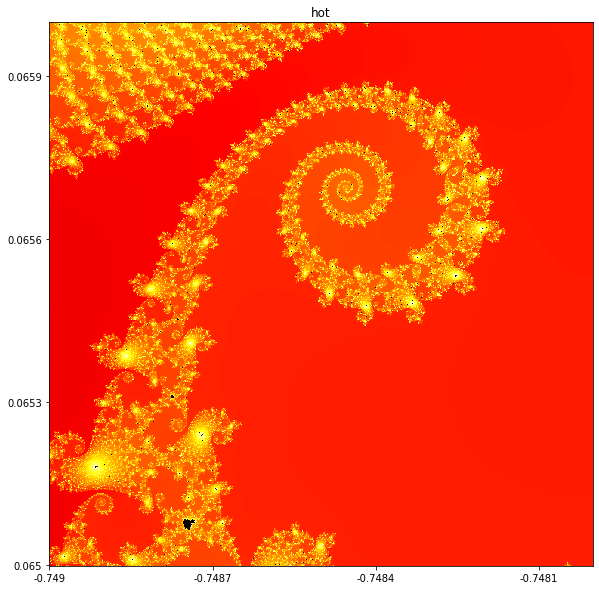

In [48]:
mandelbrot_image(-0.749, -0.748 , 0.065, 0.066, maxiter=2048, cmap='hot')

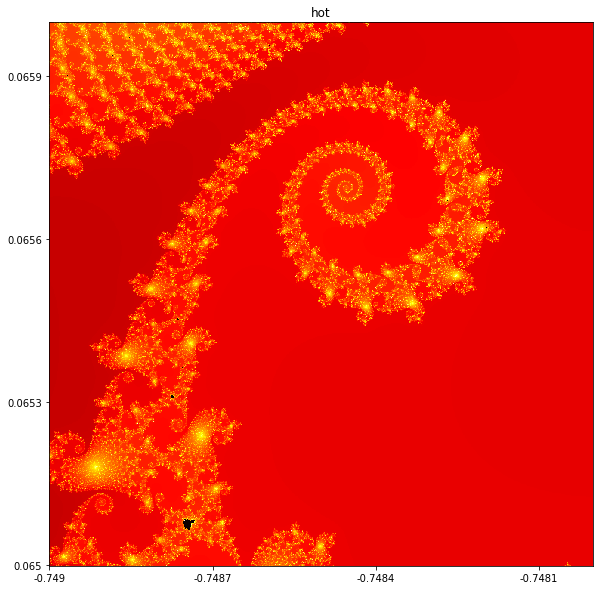

In [49]:
mandelbrot_image(-0.749, -0.748 , 0.065, 0.066, maxiter=4096, cmap='hot')